In [165]:
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [166]:
dbname='ramen_stock.db'  # dbname 
def selData(whr=' where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY,SCOMP,OPENP,HIGHP,LOWP,CLOSEP,VOL from nongshim '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows


In [167]:
whr='where SDAY>20140101 order by SDAY  asc '     #sql문으로 원하는값 뽑기
res=selData(whr)
cols=['SDAY','SCOMP','OPENP','HIGHP','LOWP','CLOSEP','VOL']
df=pd.DataFrame(data=res,columns=cols)
df.head()

,SDAY,SCOMP,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20140102,삼양식품,24650,24650,24050,24400,28215
1,20140102,농심,249000,256000,249000,251000,23071
2,20140102,오뚜기,396500,418500,386000,407500,15168
3,20140103,삼양식품,24400,25350,24350,25200,104812
4,20140103,농심,251500,260500,251500,259000,47507


In [168]:
df.shape

(4983, 7)

In [169]:
nongshim_df = df[df['SCOMP'] =='농심']
samyang_df = df[df['SCOMP'] == '삼양식품']
ottugi_df = df[df['SCOMP'] == '오뚜기']


In [170]:
samyang_df.shape

(1661, 7)

# nongshim_df , samyang_df 등은 원래 df에서 가져온건데, 원래 df는 SDAY와 INDEX가 엮여있는 구조라서 reset.index 하면 NaN값이 나옴. 그래서 다시 csv로 이들을 보낸담에 다시 불러오는 걸 하면 코드가 완성됨

In [220]:
nongshim_df.to_csv('nongshim_df.csv')

In [228]:
samyang_df.to_csv('samyang_df.csv')
ottugi_df.to_csv('ottugi_df.csv')

In [229]:
nongshim_df = pd.read_csv('nongshim_df.csv')
samyang_df = pd.read_csv('samyang_df.csv')
ottugi_df = pd.read_csv('ottugi_df.csv')

In [231]:
nongshim_df.reindex(np.arange(0,len(nongshim_df)))
samyang_df.reindex(np.arange(0,len(samyang_df)))
ottugi_df.reindex(np.arange(0,len(ottugi_df)))

,Unnamed: 0,SDAY,SCOMP,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,2,20140102,오뚜기,396500,418500,386000,407500,15168
1,5,20140103,오뚜기,406500,406500,386000,386500,7560
2,8,20140106,오뚜기,386500,390500,381000,382500,4547
3,11,20140107,오뚜기,382000,393500,382000,384500,3741
4,14,20140108,오뚜기,383500,399000,383500,386500,4097
...,...,...,...,...,...,...,...,...
1656,4970,20200925,오뚜기,569000,569000,561000,562000,2688
1657,4973,20200928,오뚜기,567000,573000,563000,570000,1876
1658,4976,20200929,오뚜기,576000,576000,567000,568000,3079
1659,4979,20201005,오뚜기,575000,580000,568000,575000,3285


In [245]:
def stock_graph(nongshim_df):
    sels=['OPENP']
    nongshim_df[sels].plot()
    days=nongshim_df['SDAY'].values
    xtic=np.arange(0,len(days),step=150)   
    xdays=[days[i] for i in xtic]     
    plt.xticks(xtic,xdays,rotation=90) 
    plt.axvline(x=1200, color='r')
    plt.xlabel('date')
    plt.ylabel('stock_price')
    plt.show()

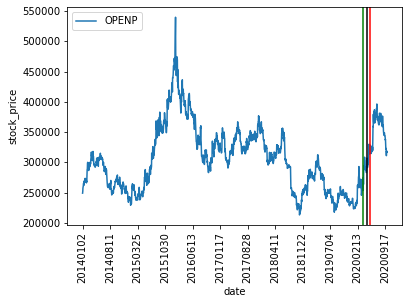

In [293]:
sels=['OPENP']
nongshim_df[sels].plot()
days=nongshim_df['SDAY'].values
xtic=np.arange(0,len(days),step=150)   
xdays=[days[i] for i in xtic]     
plt.xticks(xtic,xdays,rotation=90) 
plt.axvline(x=1530, color='green', label = '신라면건면')
plt.axvline(x=1550, color='black', label = '짜파구리')
plt.axvline(x=1566, color='red', label = '앵그리너구리')
plt.xlabel('date')
plt.ylabel('stock_price')
plt.show()

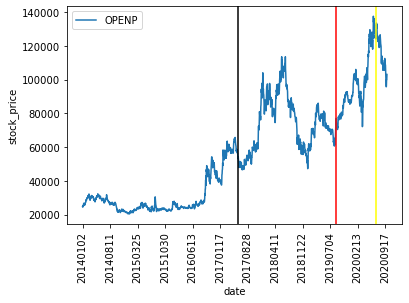

In [294]:
sels=['OPENP']
samyang_df[sels].plot()
days=samyang_df['SDAY'].values
xtic=np.arange(0,len(days),step=150)   
xdays=[days[i] for i in xtic]     
plt.xticks(xtic,xdays,rotation=90) 
plt.axvline(x=850, color='black', label = '짜파구리')
plt.axvline(x=1380, color='red', label = '마라탕면/마라볶음면')
plt.axvline(x=1600, color='yellow', label = '크림까르보불닭')
plt.xlabel('date')
plt.ylabel('stock_price')
plt.show()

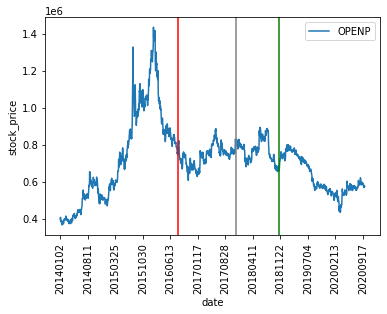

In [291]:
sels=['OPENP']
ottugi_df[sels].plot()
days=ottugi_df['SDAY'].values
xtic=np.arange(0,len(days),step=150)   
xdays=[days[i] for i in xtic]     
plt.xticks(xtic,xdays,rotation=90) 
plt.axvline(x=643, color='red', label = '부대찌개면')
plt.axvline(x=957, color='gray', label = '굴진짬뽕')
plt.axvline(x=1193, color='green', label = '채황라면')
plt.xlabel('date')
plt.ylabel('stock_price')
plt.show()